In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
##################################     R E T 3 A T R      S T R A T E G Y       ###########################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [2]:
# CLEAR VAR
from clearall import clearall
clearall()

In [3]:
# LIBRAIRIES
import pandas as pd
import numpy as np
import time
import talib
import hmmlearn
import datetime as dt


In [4]:
%%time

x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

df = pd.read_csv('Base_Clean/'+x.replace('/','')+_period+'.csv')
df = df.drop(['HigMax','LowMin','Total'],axis=1)

CPU times: user 1.54 s, sys: 194 ms, total: 1.73 s
Wall time: 1.74 s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751406 entries, 0 to 751405
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      751406 non-null  object 
 1   OpenBid   751406 non-null  float64
 2   HighBid   751406 non-null  float64
 3   LowBid    751406 non-null  float64
 4   CloseBid  751406 non-null  float64
 5   OpenAsk   751406 non-null  float64
 6   HighAsk   751406 non-null  float64
 7   LowAsk    751406 non-null  float64
 8   CloseAsk  751406 non-null  float64
 9   Open      751406 non-null  float64
 10  High      751406 non-null  float64
 11  Low       751406 non-null  float64
 12  Close     751406 non-null  float64
dtypes: float64(12), object(1)
memory usage: 74.5+ MB


In [6]:
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965


In [7]:
# VANILLA TEST ON RETURN

In [8]:
%%time
df['Return3Neg'] = (df['CloseAsk'] - df['CloseBid'].shift(3))/df['CloseBid'].shift(3)
df['Return3Pos'] = (df['CloseBid'] - df['CloseAsk'].shift(3))/df['CloseAsk'].shift(3)
df['Return3'] = np.where(df['Return3Pos']>0,1,np.where(df['Return3Neg'],-1,0))
df['ATR'] = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=5)
df['Signal'] = np.where(df['Return3']>0,1,-1)
df.head()

CPU times: user 42.8 ms, sys: 6.48 ms, total: 49.2 ms
Wall time: 48.3 ms


,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return3Neg,Return3Pos,Return3,ATR,Signal
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110,NaN,NaN,-1,NaN,-1
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015,NaN,NaN,-1,NaN,-1
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985,NaN,NaN,-1,NaN,-1
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930,0.000000,-0.000279,0,NaN,-1
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965,0.000124,-0.000202,-1,NaN,-1


In [9]:
df[df['Return3'] == 1].shape[0],df[df['Return3'] == -1].shape[0],df[df['Return3'] == 0].shape[0],df.shape[0],df[(df['Return3'] == -1)&(df['Return3'] == 1)].shape[0],df.shape[0],df[(df['Return3'] == 0)&(df['Return3'] == 0)].shape[0]

(247211, 497789, 6406, 751406, 0, 751406, 6406)

In [10]:
len(df[df.Signal == -1]),len(df[df.Signal == 1]),len(df[df.Signal == -1])-len(df[df.Signal == 1])

(504195, 247211, 256984)

In [11]:
df = df.dropna()
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return3Neg,Return3Pos,Return3,ATR,Signal
5,2010-09-06 17:25:00,1.28784,1.28787,1.28745,1.28761,1.28809,1.28809,1.28763,1.28784,1.287965,1.287980,1.287540,1.287725,-0.000062,-0.000342,-1,0.000300,-1
6,2010-09-06 17:30:00,1.28761,1.28781,1.28730,1.28752,1.28784,1.28799,1.28753,1.28775,1.287725,1.287900,1.287415,1.287635,-0.000070,-0.000388,-1,0.000337,-1
7,2010-09-06 17:35:00,1.28752,1.28752,1.28732,1.28738,1.28775,1.28775,1.28750,1.28759,1.287635,1.287635,1.287410,1.287485,-0.000194,-0.000551,-1,0.000315,-1
8,2010-09-06 17:40:00,1.28738,1.28744,1.28729,1.28735,1.28759,1.28764,1.28749,1.28757,1.287485,1.287540,1.287390,1.287460,-0.000031,-0.000380,-1,0.000282,-1
9,2010-09-06 17:45:00,1.28735,1.28736,1.28735,1.28736,1.28757,1.28760,1.28754,1.28760,1.287460,1.287480,1.287445,1.287480,0.000062,-0.000303,-1,0.000232,-1


In [12]:
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
import colorama as col

Début des opérations horodatée à 2020-11-16 20:06:16.155143
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/svm/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


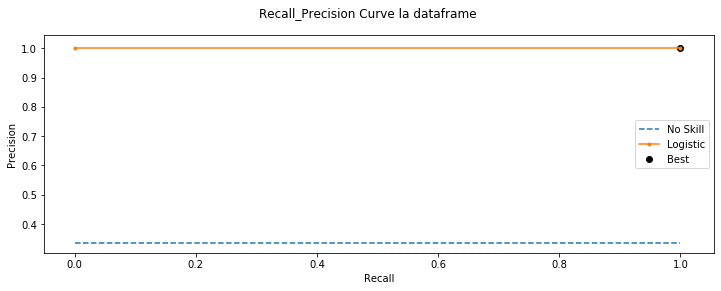



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:02.929578
Début des opérations horodatée à 2020-11-16 20:06:19.359990
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 75.18 %
Achat - Precision : 63.03 %
Achat - Recall : 63.04 %
Achat - F-measure: : 63.04 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81    279530
         1.0       0.63      0.63      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[227311  52219]
 [ 52209  89045]]


 Joblib Model  JOBLIB/svm/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.630


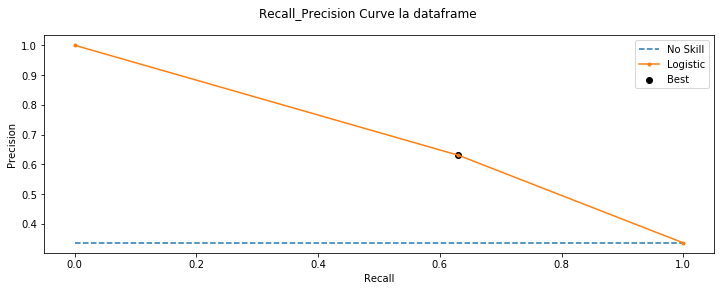



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:19:43.486091
 Achat pour  EUR/USD 

Achat - Accuracy : 77.05 %
Achat - Precision : 62.03 %
Achat - Recall : 62.03 %



              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84    104860
         1.0       0.62      0.62      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87613 17247]
 [17247 28173]]




In [12]:
from svm import modelize


_model = 'svm'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:46:52.973014
 Regression Logistique pour  EUR/USD 
reglog
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/reglog/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


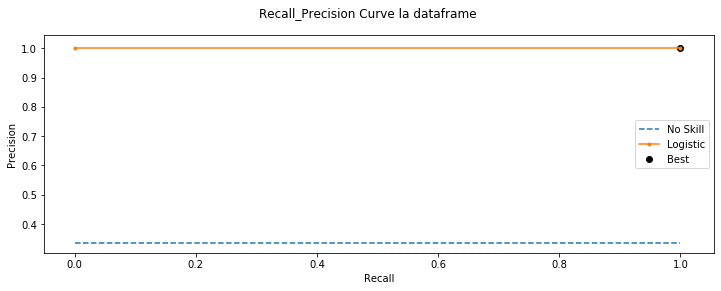



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:03.245517
Début des opérations horodatée à 2020-11-16 22:46:56.505631
 Regression Logistique pour  EUR/USD 
reglog
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 74.63 %
Achat - Precision : 61.94 %
Achat - Recall : 63.33 %
Achat - F-measure: : 62.63 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.80      0.81    279530
         1.0       0.62      0.63      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[224554  54976]
 [ 51794  89460]]


 Joblib Model  JOBLIB/reglog/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.626


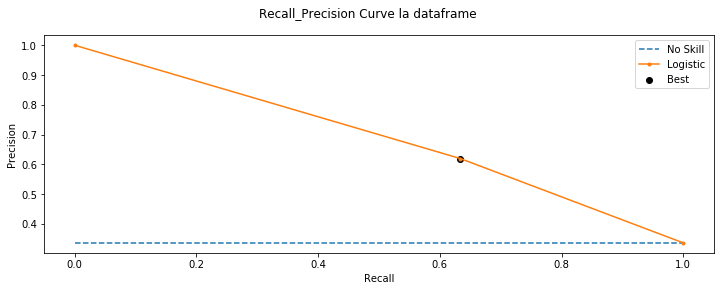



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:03.236054
 reglog  pour  EUR/USD 

Achat - Accuracy : 76.34 %
Achat - Precision : 60.49 %
Achat - Recall : 62.56 %



              precision    recall  f1-score   support

        -1.0       0.84      0.82      0.83    104860
         1.0       0.60      0.63      0.62     45420

    accuracy                           0.76    150280
   macro avg       0.72      0.72      0.72    150280
weighted avg       0.77      0.76      0.76    150280

[[86304 18556]
 [17005 28415]]




In [13]:

from reglog import modelize

_model = 'reglog'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

In [14]:
from mlp import modelize

_model = 'mlp'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 23:05:10.601570
 Multi Layer Perceptron pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Processing Deep Learning 
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
 Achat pour  EUR/USD 

Achat - Accuracy : 0.0 %
Achat - Precision : 0.0 %
Achat - Recall : 0.0 %
Achat - F-measure: : 0.0 % 


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00  279530.0
         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00  141254.0

    accuracy                           0.00  420784.0
   macro avg       0.00      0

NameError: name 'model' is not defined

Début des opérations horodatée à 2020-11-16 22:47:47.039283
 Regression Logistique pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/bayes_gnb/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


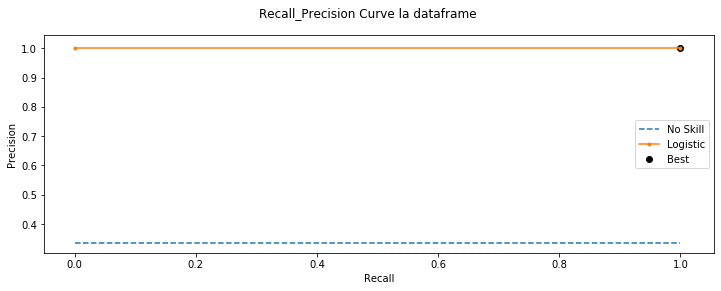



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:02.767133
Début des opérations horodatée à 2020-11-16 22:47:50.078319
 Regression Logistique pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 74.67 %
Achat - Precision : 61.91 %
Achat - Recall : 63.79 %
Achat - F-measure: : 62.84 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.80      0.81    279530
         1.0       0.62      0.64      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[224099  55431]
 [ 51149  90105]]


 Joblib Model  JOBLIB/bayes_gnb/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.628


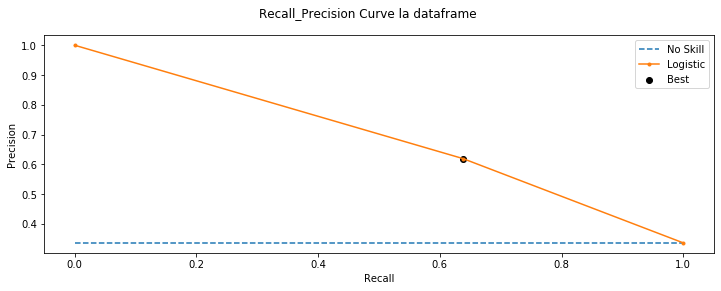



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:03.103726
 bayes_gnb  pour  EUR/USD 

Achat - Accuracy : 76.87 %
Achat - Precision : 61.6 %
Achat - Recall : 62.29 %



              precision    recall  f1-score   support

        -1.0       0.84      0.83      0.83    104860
         1.0       0.62      0.62      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87223 17637]
 [17130 28290]]




In [13]:
from bayes_gnb import modelize

_model = 'bayes_gnb'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:49:19.439300
 Regression Logistique pour  EUR/USD 
Kneib_centroid
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/Kneib_centroid/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


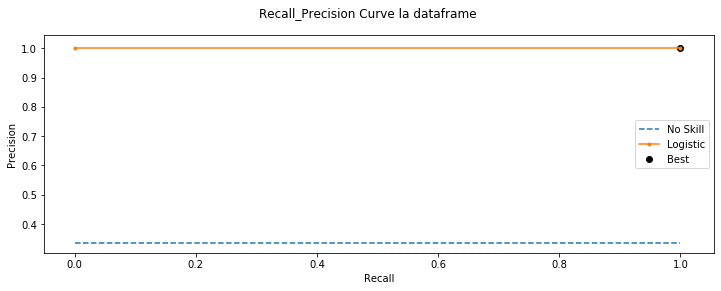



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:02.842678
Début des opérations horodatée à 2020-11-16 22:49:22.579960
 Regression Logistique pour  EUR/USD 
Kneib_centroid
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 74.66 %
Achat - Precision : 61.96 %
Achat - Recall : 63.52 %
Achat - F-measure: : 62.73 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.80      0.81    279530
         1.0       0.62      0.64      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[224439  55091]
 [ 51533  89721]]


 Joblib Model  JOBLIB/Kneib_centroid/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.627


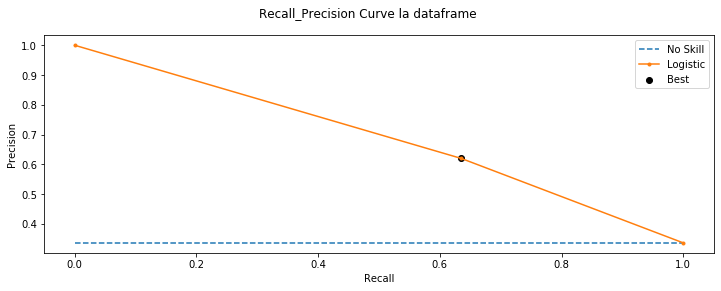



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:03.335723
 Kneib_centroid  pour  EUR/USD 

Achat - Accuracy : 76.34 %
Achat - Precision : 60.49 %
Achat - Recall : 62.56 %



              precision    recall  f1-score   support

        -1.0       0.84      0.82      0.83    104860
         1.0       0.60      0.63      0.62     45420

    accuracy                           0.76    150280
   macro avg       0.72      0.72      0.72    150280
weighted avg       0.77      0.76      0.76    150280

[[86304 18556]
 [17005 28415]]




In [13]:
from Kneib_centroid import modelize

_model = 'Kneib_centroid'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:50:09.207939
 Random Forest Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/forest/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


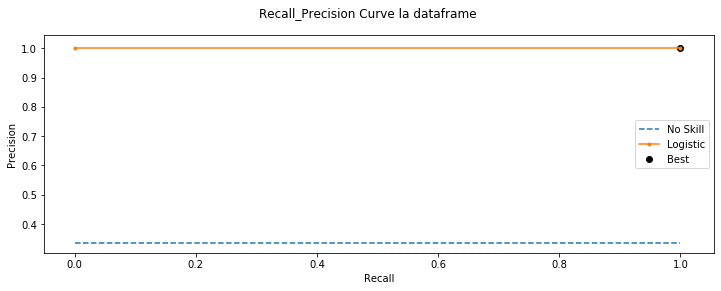



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:07.940979
Début des opérations horodatée à 2020-11-16 22:50:17.434640
 Random Forest Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 74.36 %
Achat - Precision : 62.93 %
Achat - Recall : 57.48 %
Achat - F-measure: : 60.08 % 


              precision    recall  f1-score   support

        -1.0       0.79      0.83      0.81    279530
         1.0       0.63      0.57      0.60    141254

    accuracy                           0.74    420784
   macro avg       0.71      0.70      0.71    420784
weighted avg       0.74      0.74      0.74    420784

[[231708  47822]
 [ 60063  81191]]


 Joblib Model  JOBLIB/forest/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.601


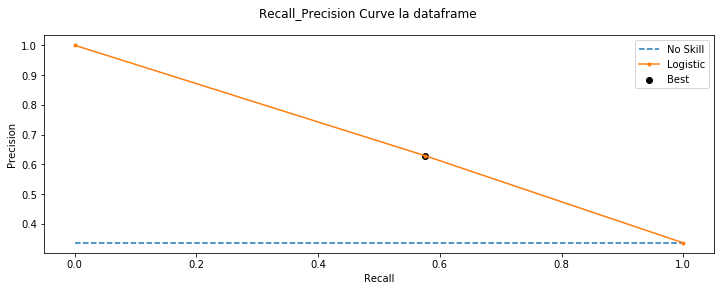



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:22.498223
 forest  pour  EUR/USD 

Achat - Accuracy : 76.42 %
Achat - Precision : 63.6 %
Achat - Recall : 51.4 %



              precision    recall  f1-score   support

        -1.0       0.81      0.87      0.84    104860
         1.0       0.64      0.51      0.57     45420

    accuracy                           0.76    150280
   macro avg       0.72      0.69      0.70    150280
weighted avg       0.75      0.76      0.76    150280

[[91497 13363]
 [22073 23347]]




In [13]:
from forest import modelize

_model = 'forest'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:11:17.437307
 Bagging K Neigbhors Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/bag/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


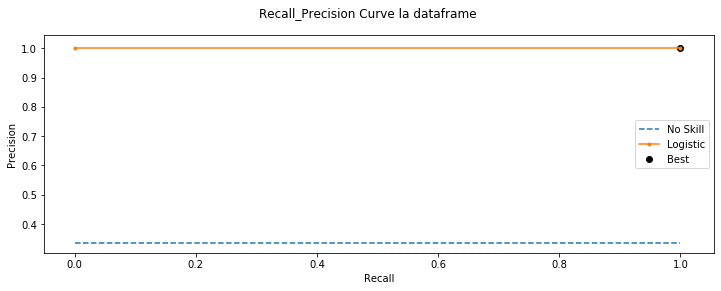



 ===> TEST INIT terminée.
Temps d'excution du module 0:12:45.381106
Début des opérations horodatée à 2020-11-16 22:24:03.093138
 Bagging K Neigbhors Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 68.14 %
Achat - Precision : 57.93 %
Achat - Recall : 18.6 %
Achat - F-measure: : 28.16 % 


              precision    recall  f1-score   support

        -1.0       0.69      0.93      0.80    279530
         1.0       0.58      0.19      0.28    141254

    accuracy                           0.68    420784
   macro avg       0.64      0.56      0.54    420784
weighted avg       0.66      0.68      0.62    420784

[[260452  19078]
 [114981  26273]]


 Joblib Model  JOBLIB/bag/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=-1.000000, F-Score=0.503


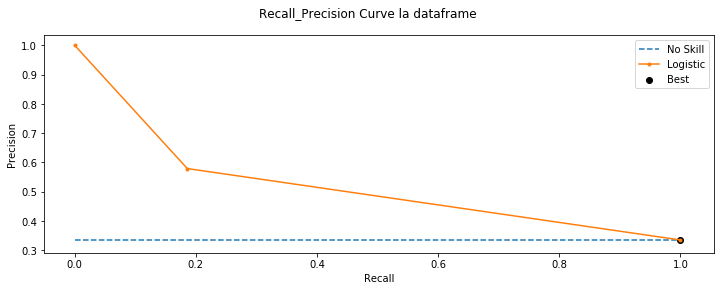



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:06:28.197497
 bag  pour  EUR/USD 

Achat - Accuracy : 71.05 %
Achat - Precision : 59.55 %
Achat - Recall : 13.14 %



              precision    recall  f1-score   support

        -1.0       0.72      0.96      0.82    104860
         1.0       0.60      0.13      0.22     45420

    accuracy                           0.71    150280
   macro avg       0.66      0.55      0.52    150280
weighted avg       0.68      0.71      0.64    150280

[[100804   4056]
 [ 39450   5970]]




In [13]:
from bag import modelize

_model = 'bag'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:53:19.527356
 Ada Boost Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/adaboost/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


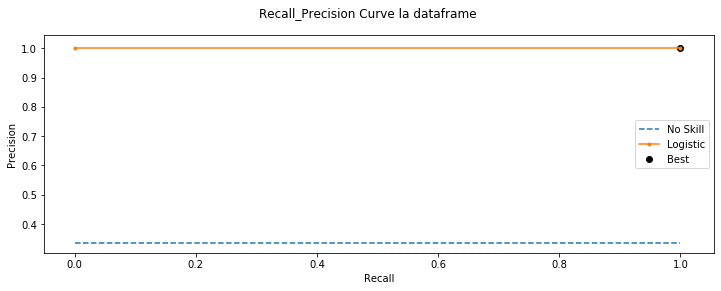



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:02.841995
Début des opérations horodatée à 2020-11-16 22:53:22.637007
 Ada Boost Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 75.2 %
Achat - Precision : 63.06 %
Achat - Recall : 63.05 %
Achat - F-measure: : 63.06 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81    279530
         1.0       0.63      0.63      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[227363  52167]
 [ 52188  89066]]


 Joblib Model  JOBLIB/adaboost/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.631


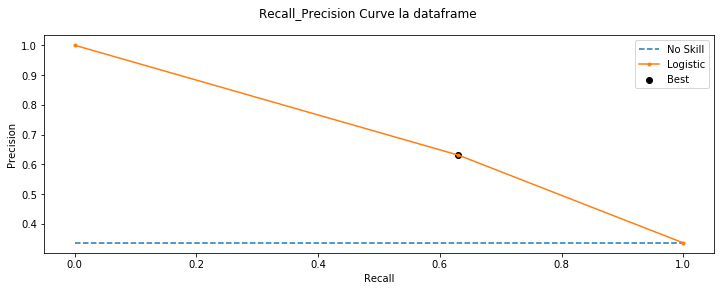



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:04.072473
 adaboost  pour  EUR/USD 

Achat - Accuracy : 77.11 %
Achat - Precision : 62.3 %
Achat - Recall : 61.42 %



              precision    recall  f1-score   support

        -1.0       0.83      0.84      0.84    104860
         1.0       0.62      0.61      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87975 16885]
 [17521 27899]]




In [13]:
from adaboost import modelize
_model = 'adaboost'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:54:57.324484
 Gradient Boost Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/gradientboosting/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


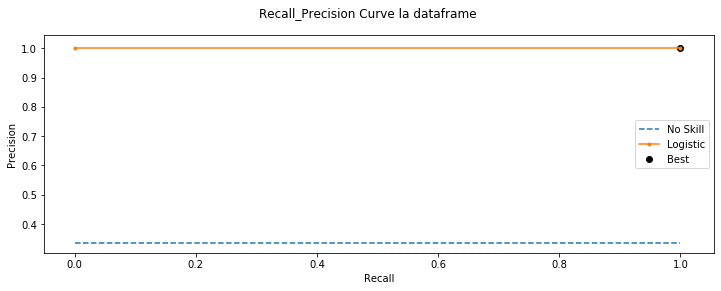



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:06.736083
Début des opérations horodatée à 2020-11-16 22:55:04.331466
 Gradient Boost Classifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 75.2 %
Achat - Precision : 63.08 %
Achat - Recall : 62.98 %
Achat - F-measure: : 63.03 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81    279530
         1.0       0.63      0.63      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[227467  52063]
 [ 52297  88957]]


 Joblib Model  JOBLIB/gradientboosting/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.630


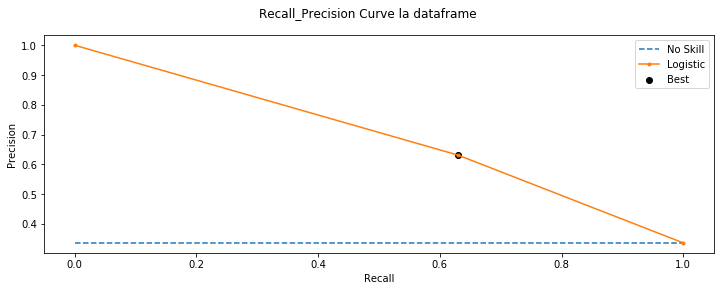



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:07.405422
 gradientboosting  pour  EUR/USD 

Achat - Accuracy : 77.07 %
Achat - Precision : 62.11 %
Achat - Recall : 61.84 %



              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84    104860
         1.0       0.62      0.62      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87728 17132]
 [17334 28086]]




In [13]:
from gradientboosting import modelize

_model = 'gradientboosting'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

Début des opérations horodatée à 2020-11-16 22:56:15.619469
 MLPClassifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 399330, 1: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 100.0 %
Achat - Precision : 100.0 %
Achat - Recall : 100.0 %
Achat - F-measure: : 100.0 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    279531
           1       1.00      1.00      1.00    141254

    accuracy                           1.00    420785
   macro avg       1.00      1.00      1.00    420785
weighted avg       1.00      1.00      1.00    420785

[[279531      0]
 [     0 141254]]


 Joblib Model  JOBLIB/mlpclassifier/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


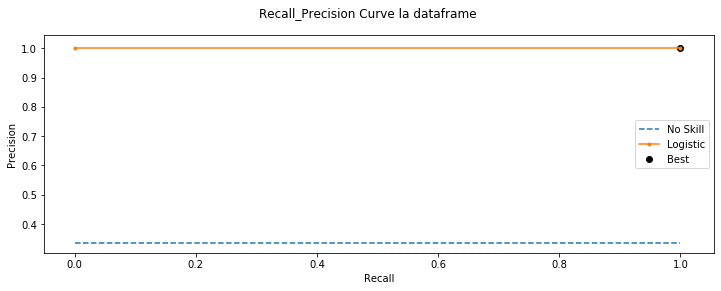



 ===> TEST INIT terminée.
Temps d'excution du module 0:00:03.574493
Début des opérations horodatée à 2020-11-16 22:56:19.476032
 MLPClassifier pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 399329, 1.0: 201791})
 Achat pour  EUR/USD 

Achat - Accuracy : 75.23 %
Achat - Precision : 63.11 %
Achat - Recall : 63.06 %
Achat - F-measure: : 63.09 % 


              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81    279530
         1.0       0.63      0.63      0.63    141254

    accuracy                           0.75    420784
   macro avg       0.72      0.72      0.72    420784
weighted avg       0.75      0.75      0.75    420784

[[227476  52054]
 [ 52184  89070]]


 Joblib Model  JOBLIB/mlpclassifier/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.631


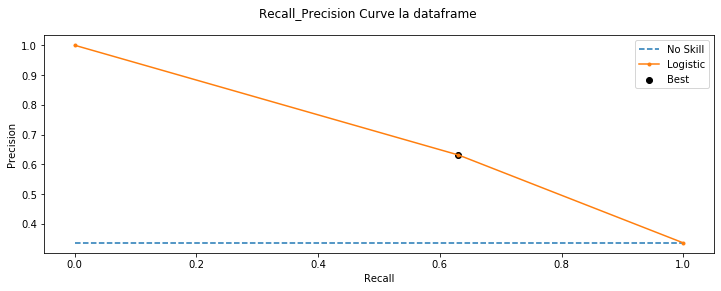



 ===> MODELISATION test & learn terminée.
Temps d'excution du module 0:00:04.353343
 mlpclassifier  pour  EUR/USD 

Achat - Accuracy : 77.05 %
Achat - Precision : 62.03 %
Achat - Recall : 62.03 %



              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84    104860
         1.0       0.62      0.62      0.62     45420

    accuracy                           0.77    150280
   macro avg       0.73      0.73      0.73    150280
weighted avg       0.77      0.77      0.77    150280

[[87613 17247]
 [17247 28173]]




In [13]:
from mlpclassifier import modelize

_model = 'mlpclassifier'

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> TEST INIT terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df.Signal = df.Signal.shift(-1)
df = df.dropna()

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x,_model)
print("\n\n ===> MODELISATION test & learn terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return3','ATR']]

loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

resultat = pd.DataFrame()
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']
accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,_model,' pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')